In [1]:
import pandas as pd
import numpy as np
from IPython.display import display

## Read dataset and info

In [2]:
FIRST_READ = True

if FIRST_READ:
    custom_date_parser = lambda c: pd.to_datetime(
        c, format="%d/%m/%Y %H:%M:%S", errors="coerce"
    )
    chunksize = 10 ** 5

    list_of_chunks = []

    with pd.read_csv(
        "data/household_power_consumption.txt",
        chunksize=chunksize,
        sep=";",
        parse_dates={"date": ["Date", "Time"]},
        na_values="?",
    ) as reader:
        for chunk in reader:
            list_of_chunks.append(chunk)

    df = pd.concat(list_of_chunks)

In [3]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   date                   datetime64[ns]
 1   Global_active_power    float64       
 2   Global_reactive_power  float64       
 3   Voltage                float64       
 4   Global_intensity       float64       
 5   Sub_metering_1         float64       
 6   Sub_metering_2         float64       
 7   Sub_metering_3         float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 126.7 MB


None

## Look at null values in columns

In [4]:
# Get all the null values
print("Null values per column:")
null_values = df.isna().sum()
null_percent = null_values * 100 / len(df)
null_values_df = pd.DataFrame(
    {"null_values": null_values, "null_value_percent": null_percent}
)
display(null_values_df)

Null values per column:


,null_values,null_value_percent
date,0,0.000000
Global_active_power,25979,1.251844
Global_reactive_power,25979,1.251844
Voltage,25979,1.251844
Global_intensity,25979,1.251844
Sub_metering_1,25979,1.251844
Sub_metering_2,25979,1.251844
Sub_metering_3,25979,1.251844


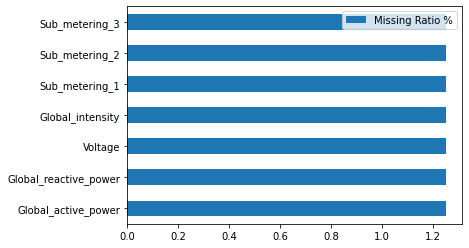

In [5]:
import matplotlib.pyplot as plt


def plot_nas(dataf: pd.DataFrame):
    if dataf.isnull().sum().sum() != 0:
        na_df = (dataf.isnull().sum() / len(df)) * 100
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({"Missing Ratio %": na_df})
        missing_data.plot(kind="barh")
        plt.show()
    else:
        print("No NAs found")


plot_nas(df)

## Assign date to index

In [15]:
print(f"Length: {len(df.date)}, Unique: {len(df.date.unique())}")

# Get first and last date
time_delta = df.date.max() - df.date.min()
dates = {
    "min": df.date.min(),
    "max": df.date.max(),
    "data_unique_values": len(df.date.unique()),
    "expected_values": time_delta,
}
print(dates)

# Get dates duplicates
duplicated_index = df.date.duplicated(keep=False)

if duplicated_index.sum() > 0:
    print(f"{duplicated_index.sum()} duplicated indexes")
else:
    print("No duplicated dates")

Length: 2075259, Unique: 2075259
{'min': Timestamp('2006-12-16 17:24:00'), 'max': Timestamp('2010-12-11 23:59:00'), 'data_unique_values': 2075259, 'expected_values': Timedelta('1456 days 06:35:00')}
No duplicated indexes


,date,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3


In [20]:
df.set_index("date", inplace=True, drop=False)
display(df.sample(5))

,date,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date,,,,,,,,
2008-04-02 00:41:00,2008-04-02 00:41:00,0.326,0.104,243.39,1.4,0.0,0.0,0.0
2009-12-07 23:34:00,2009-12-07 23:34:00,0.130,0.000,242.71,0.6,0.0,0.0,1.0
2010-04-03 02:48:00,2010-04-03 02:48:00,0.342,0.106,244.85,1.4,0.0,1.0,1.0
2010-08-13 16:59:00,2010-08-13 16:59:00,0.928,0.318,241.88,4.0,0.0,0.0,13.0
2009-01-05 02:13:00,2009-01-05 02:13:00,1.440,0.130,243.11,5.8,0.0,0.0,19.0


In [21]:
# Get dates duplicates
duplicated_index = df.index.duplicated(keep=False)

if duplicated_index.sum() > 0:
    print(f"{duplicated_index.sum()} duplicated indexes")
else:
    print("No duplicated dates")

No duplicated dates


In [23]:
# If i need to reindex with minutes resolution
new_index = pd.date_range(df.index.min(), df.index.max(), freq="T")
print(new_index)

DatetimeIndex(['2006-12-16 17:24:00', '2006-12-16 17:25:00',
               '2006-12-16 17:26:00', '2006-12-16 17:27:00',
               '2006-12-16 17:28:00', '2006-12-16 17:29:00',
               '2006-12-16 17:30:00', '2006-12-16 17:31:00',
               '2006-12-16 17:32:00', '2006-12-16 17:33:00',
               ...
               '2010-12-11 23:50:00', '2010-12-11 23:51:00',
               '2010-12-11 23:52:00', '2010-12-11 23:53:00',
               '2010-12-11 23:54:00', '2010-12-11 23:55:00',
               '2010-12-11 23:56:00', '2010-12-11 23:57:00',
               '2010-12-11 23:58:00', '2010-12-11 23:59:00'],
              dtype='datetime64[ns]', length=2097036, freq='T')


In [26]:
# Interpolate missing values
df = df.drop(columns="date")
df = df.interpolate()

In [27]:
df.to_parquet("data/household.parquet")